In [1]:
import cv2

In [2]:
import urllib.request as req
url = "http://uta.pw/shodou/img/28/214.png"
req.urlretrieve(url, "test.png")
img = cv2.imread("test.png")
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [3]:
img = cv2.imread("test.png")
print(type(img))

<class 'numpy.ndarray'>


In [4]:
%matplotlib inline

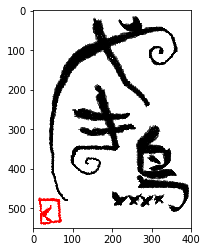

In [5]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

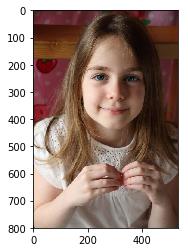

In [6]:
img = cv2.imread("test.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

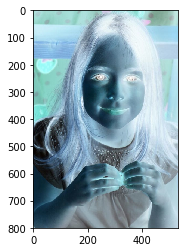

In [7]:
img = 255 -img
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

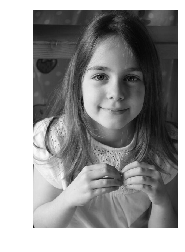

In [8]:
img = cv2.imread("test.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

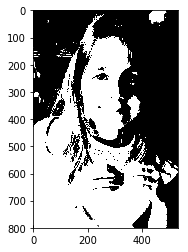

In [9]:
th = 90
img[img > th] = 255
img[img < th] = 0
plt.imshow(img, cmap="gray")
plt.show()

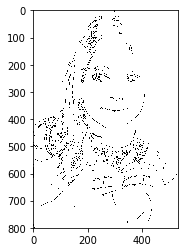

In [10]:
img = cv2.imread("test.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.Canny(img, 100, 200, 255)
img = 255 - img
cv2.imwrite("out.png", img)
plt.imshow(img, cmap="gray")
plt.show()

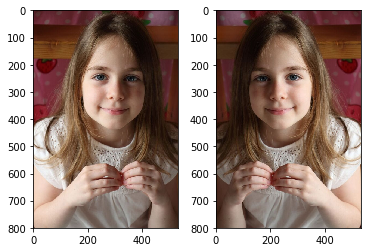

In [11]:
img = cv2.imread("test.jpg")

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
img2 = cv2.flip(img, 1)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

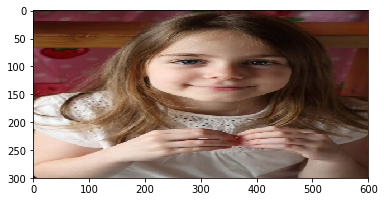

In [12]:
img = cv2.imread("test.jpg")
im2 = cv2.resize(img, (600, 300))
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

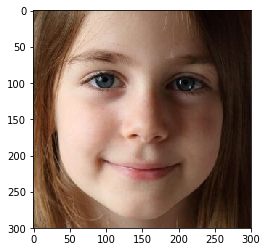

In [13]:
im2 = img[150:450, 150:450]
cv2.imwrite("cut-test.png", im2)
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

얼굴의 좌표 = 319 308 405 405


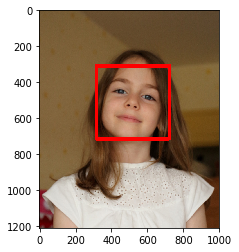

In [14]:
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread("girl.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))
if len(face_list) == 0:
    print("얼굴 인식 실패")
    quit()
for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
def mosaic(img, rect, size):
    (x1, y1, x2, y2) = rect
    w = x2 -x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    i_small = cv2.resize(i_rect, (size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

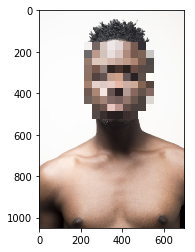

In [16]:
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread("niggger.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))
if len(face_list) == 0:
    print("얼굴 인식 실패")
    quit()
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)
cv2.imwrite("niggger-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()